# B 站搜索数据分析项目流程演示

设置搜索关键词等参数，其余代码块按需运行查看即可。

In [45]:
# -------------设置搜索参数-----------------
keyword = "深度学习" # 搜索关键词 
pages = 30 # 搜索页数
page_size = 30 # 每页结果数量(默认30)

## 数据获取

### bili_search_scraper.py

`bili_search_scraper.py` 爬取数据代码，输出初步清理后的 csv 格式表格。
一定要有 `cookie.txt`，否则无法运行脚本，会报错！获取方法详细见 `README.md`。

In [46]:
import bili_search_scraper as bs

In [47]:
out = f"{keyword}_搜索.csv" # 输出的文件名(建议默认)

In [48]:
with open("cookie.txt", "r", encoding="utf-8") as f:
    cookie = f.read().strip()

df = bs.crawl_bilibili_search(
    keyword=keyword,
    pages=pages,
    page_size=page_size,
    cookie=cookie
)

df.to_csv(out, index=False, encoding="utf_8_sig")
print(f"爬取成功！搜索结果已保存到 {out}")

爬取成功！搜索结果已保存到 深度学习_搜索.csv


## 探索性数据分析（EDA）

### bilibili_search_top10.py

In [49]:
import pandas as pd

df = pd.read_csv(f"{keyword}_搜索.csv", encoding="utf_8_sig")

利用 pandas 和字典统计出现次数最多的前十个词，并且利用 matplotlib 画出柱状图。

author（UP 主）出现次数 Top10
- 统计搜索结果中视频发布者出现频率
- 分析是否存在“头部 UP 主集中现象”

In [50]:
top10_author_df = (
    df['author']
    .value_counts()
    .head(10)
    .reset_index()
)

top10_author_df.columns = ['author', 'count']
top10_author_df

,author,count
0,跟李沐学AI,81
1,AI算法工程师Future,22
2,尚硅谷,10
3,黑马程序员,7
4,梗直哥丶,7
5,李宏毅-机器学习,7
6,3Blue1Brown,6
7,半途不而废的程序猿,6
8,飞天闪客,6
9,吴恩达深度学习,6


type_name（视频分区）出现次数 Top10

In [51]:
top10_type_df = (
    df['type_name']
    .value_counts()
    .head(10)
    .reset_index()
)

top10_type_df.columns = ['type_name', 'count']
top10_type_df

,type_name,count
0,计算机技术,569
1,校园学习,136
2,科学科普,35
3,野生技能协会,21
4,日常,17
5,数码,13
6,软件应用,8
7,社科·法律·心理,6
8,娱乐粉丝创作,4
9,电子竞技,4


tag（标签）出现次数 Top10

In [52]:
# 拆分标签 tag
tags = (
    df['tag']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
)

# 统计出现频率最高的10个标签
top10_tag_df = (
    tags
    .value_counts()
    .head(10)
    .reset_index()
)

top10_tag_df.columns = ['tag', 'count']
top10_tag_df


,tag,count
0,深度学习,682
1,人工智能,644
2,机器学习,458
3,神经网络,359
4,Python,190
5,AI,185
6,计算机视觉,173
7,学习,133
8,PyTorch,102
9,卷积神经网络,82


绘制柱状图

In [53]:
import platform
import matplotlib.pyplot as plt

解决 matplotlib 的中文乱码问题

In [54]:
# 1. 按系统给出一个“优先字体列表”
font_map = {
    'Darwin':  ['Arial Unicode MS', 'PingFang SC', 'Heiti SC'],      # macOS
    'Windows': ['SimHei', 'Microsoft YaHei', 'KaiTi'],               # Windows
    'Linux':   ['Noto Sans CJK SC', 'WenQuanYi Micro Hei']           # Linux
}

# 2. 找到当前系统
sys_name = platform.system()
candidates = font_map.get(sys_name, font_map['Linux'])

# 3. 依次试，直到找到一个系统里存在的
import matplotlib.font_manager as fm
avail = [f.name for f in fm.fontManager.ttflist]
for font in candidates:
    if font in avail:
        plt.rcParams['font.sans-serif'] = [font]
        break
else:                       # 一个都没找到，兜底用DejaVu+警告
    import warnings
    warnings.warn('未找到合适中文字体，图表中文可能显示为方块')

# 4. 解决负号乱码
plt.rcParams['axes.unicode_minus'] = False

UP 主 Top10 柱状图

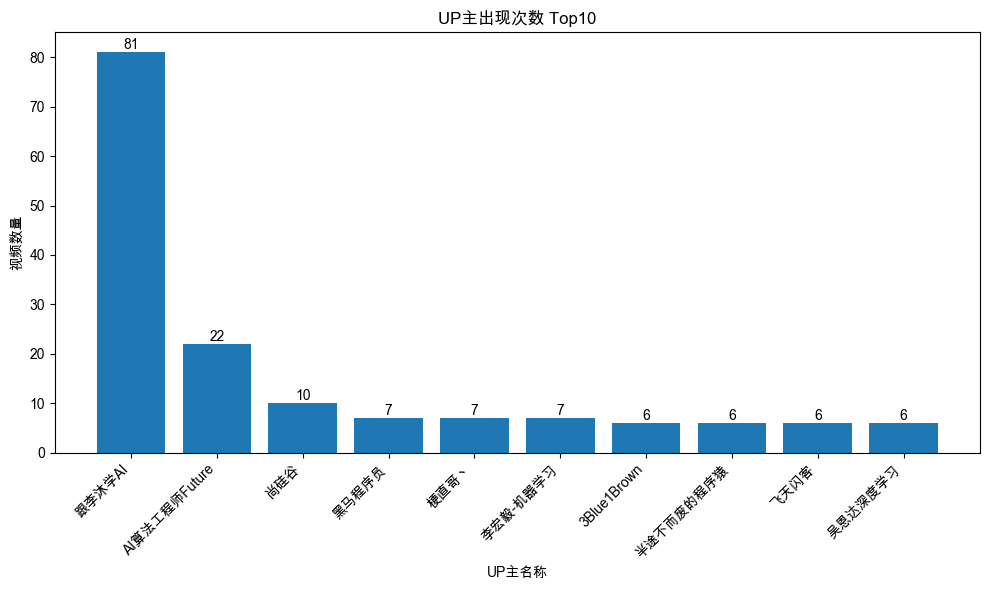

In [55]:
plt.figure(figsize=(10, 6))

bars = plt.bar(top10_author_df['author'], top10_author_df['count'])

plt.title('UP主出现次数 Top10')
plt.xlabel('UP主名称')
plt.ylabel('视频数量')

plt.xticks(rotation=45, ha='right')

# 在柱子上方标注数值
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x 位置：柱子中心
        height,                              # y 位置：柱子顶部
        f'{int(height)}',                    # 显示的文本
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


视频分区（type_name）出现次数 Top10

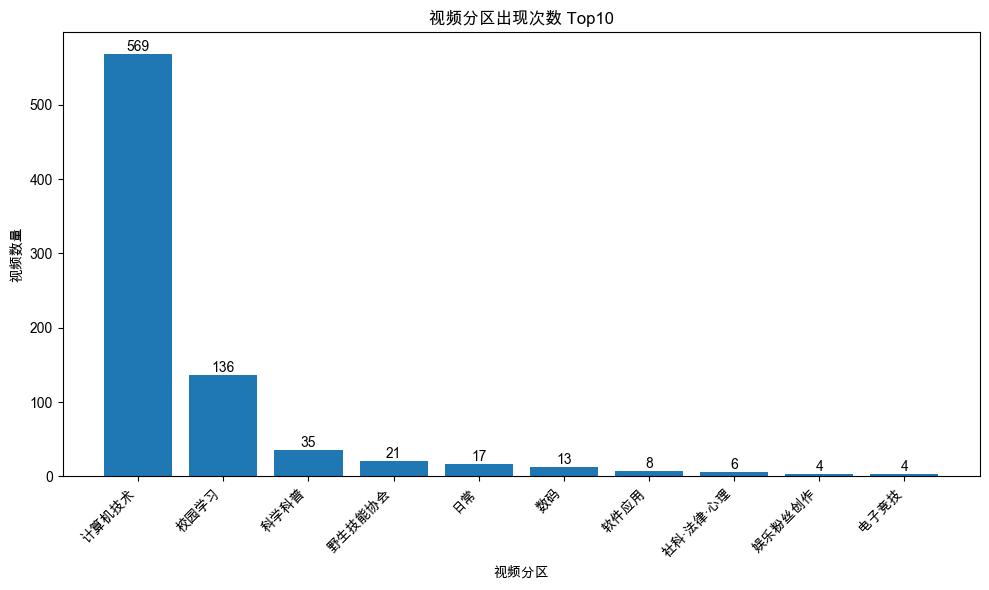

In [56]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_type_df['type_name'], top10_type_df['count'])

plt.title('视频分区出现次数 Top10')
plt.xlabel('视频分区')
plt.ylabel('视频数量')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


标签（tag）出现次数 Top10

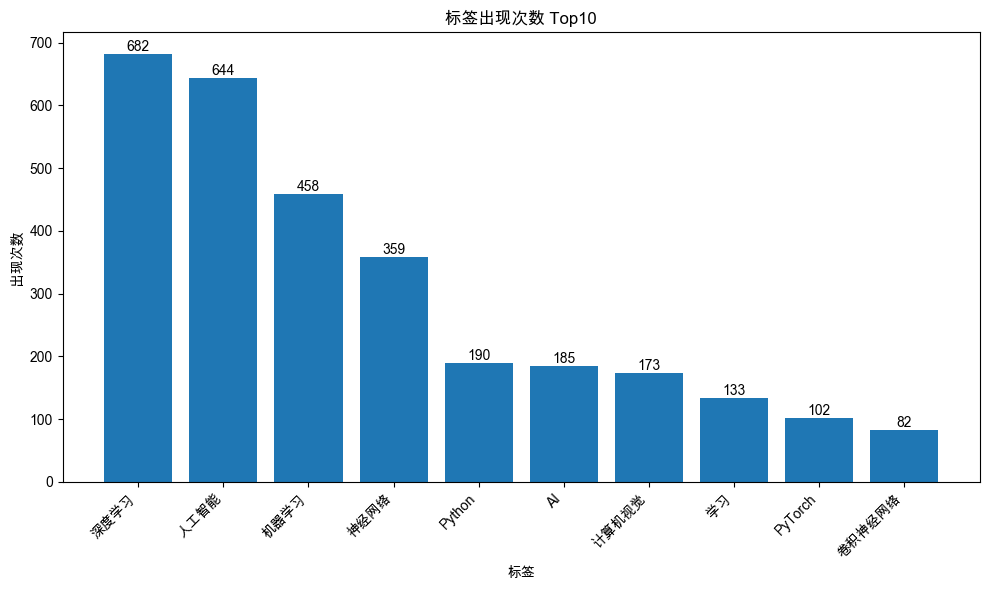

In [57]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_tag_df['tag'], top10_tag_df['count'])

plt.title('标签出现次数 Top10')
plt.xlabel('标签')
plt.ylabel('出现次数')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


## 分词、统计标题词频

### bilibili_title_wordfreq.py

In [58]:
import pandas as pd
import jieba

In [61]:
csv_file = f"{keyword}_搜索.csv" # 输入 CSV
title_txt = f"{keyword}_titles.txt" # 输出标题文本
stopwords_file = "stopwords.txt" # 停用词表
output_csv = f"{keyword}_title_word_freq.csv" # 词频结果 CSV

从 CSV 提取标题并保存为 txt

In [62]:
df = pd.read_csv(csv_file, encoding="utf_8_sig")

titles = df['title'].dropna().astype(str)

with open(title_txt, 'w', encoding='utf-8') as f:
    for t in titles:
        f.write(t + '\n')

print(f"已保存标题文本：{title_txt}")

已保存标题文本：深度学习_titles.txt


读取标题文本

In [63]:
with open(title_txt, 'r', encoding='utf-8') as f:
    content = f.read()

print("文本前200字示例：")
print(content[:200])

文本前200字示例：
PyTorch深度学习快速入门教程（绝对通俗易懂！）【小土堆】
【神经网络】神经网络与深度学习3小时期末速成|神经网络与深度学习期末复习|各版本通用
一位研究生导师来问我如何学习和提升深度学习代码能力，想要帮学生debug！！！竟然有这种神仙导师！
90分钟！清华博士带你一口气搞懂人工智能和神经网络
黑马程序员AI大模型《神经网络与深度学习》全套视频课程，涵盖Pytorch深度学习框架、BP神经网


加载停用词表 `stopwords.txt`

In [64]:
with open(stopwords_file, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

jieba 分词并统计词频

因为统计的 title 是根据搜索词搜索出来的，所以 title 中一定包含这个 keyword，因此将搜索词也统计词频是无意义的，因此需要先剔除搜索词的分词结果。

In [72]:
exclude_words = set(jieba.cut(keyword))
print("搜索词分词：", exclude_words)

搜索词分词： {'学习', '深度'}


In [73]:
words = jieba.cut(content)

word_counts = {}

for word in words:
    word = word.strip()

    if not word:
        continue
    if word in stopwords:
        continue
    if word == keyword:
        continue
    if word in exclude_words:   # 剔除搜索词分词后的所有子词
        continue
    if len(word) <= 1:
        continue

    word_counts[word] = word_counts.get(word, 0) + 1

输出标题包含词 Top10 高频词

In [74]:
sorted_words = sorted(
    word_counts.items(),
    key=lambda x: x[1],
    reverse=True
)

print("\n标题中出现频率最高的词 Top10：")
for word, count in sorted_words[:10]:
    print(f"{word}: {count}")


标题中出现频率最高的词 Top10：
神经网络: 226
机器: 193
入门: 183
AI: 182
人工智能: 172
模型: 128
教程: 126
实战: 115
基础: 108
算法: 94


In [78]:
word_freq_df = pd.DataFrame(
    sorted_words,
    columns=['word', 'count']
)

word_freq_df.to_csv(output_csv, index=False, encoding='utf_8_sig')

print(f"\n词频统计结果已保存为：{output_csv}")


词频统计结果已保存为：深度学习_title_word_freq.csv
